RandomForest Regressor modeli farklı karar alma algoritmalarında veriden subsetler oluşturarak ortak bir karar almayı sağlayan kümelemeli makine öğrenme yöntemidir.
Öncelikle aşağıdaki hücrede gerekli kütüphane ve elemanları import ederek başlayalım.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
warnings.filterwarnings('ignore')

In [21]:
#TRAİN
df=pd.read_csv('PCA_transformed_features.csv')
x=df.select_dtypes(include=[np.number]).drop(columns=['id','CO2_EMISS_CURR_PER_FLOOR_AREA'])#
x=df.iloc[:, :2].values

y=df['CO2_EMISS_CURR_PER_FLOOR_AREA'].values

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = x[:-10],x[-10:],y[:-10],y[-10:] 

from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)



In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Özelleştirilmiş parametre değerlerini tanımlayın
n_estimators = 1000
max_depth = 6
min_samples_split = 10
min_samples_leaf = 4
max_features = 'sqrt'
random_state = 0

# RandomForestRegressor'ü özelleştirilmiş parametrelerle oluşturun
regressor = RandomForestRegressor(n_estimators=n_estimators, 
                                  max_depth=max_depth, 
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf, 
                                  max_features=max_features, 
                                  random_state=random_state, 
                                  oob_score=True)

regressor.fit(x_train, y_train)
print(x_train.shape, y_train.shape)

(785, 2) (785,)


In [33]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(x_test)


# # Evaluating the model
rf_mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {rf_mse}')

rf_mae=mean_absolute_error(y_test,predictions)
print(rf_mae)

predictions=predictions.round(2)
rf_r2 = r2_score(y_test, predictions)
print(f'R-squared: {rf_r2}')

for i in range(5):
    print(f'The predicted CO2 emisson pef floor area for the building {i} is {predictions[i]} and the real value is {y_test[i]}')

Out-of-Bag Score: -0.05481751926151768
Mean Squared Error: 6.091743207761549
1.9624153613694646
R-squared: 0.8206154072331668
The predicted CO2 emisson pef floor area for the building 0 is 37.86 and the real value is 36
The predicted CO2 emisson pef floor area for the building 1 is 37.86 and the real value is 36
The predicted CO2 emisson pef floor area for the building 2 is 40.97 and the real value is 39
The predicted CO2 emisson pef floor area for the building 3 is 46.57 and the real value is 46
The predicted CO2 emisson pef floor area for the building 4 is 40.97 and the real value is 39


In [24]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model=SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
# Making predictions on the same data or new data

# # Evaluating the model
svr_mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {svr_mse}')

svr_mae=mean_absolute_error(y_test,predictions)
print('mae:',svr_mae)

svr_r2 = r2_score(y_test, predictions)
print(f'R-squared: {svr_r2}')


Mean Squared Error: 8.441724242944577
mae: 2.2138559533643045
R-squared: 0.7517869966790773


In [25]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=6)

xgb_model.fit(X_train_scaled, y_train, eval_metric="rmse")

y_pred = xgb_model.predict(X_test_scaled)
# # Evaluating the model
xgb_mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {xgb_mse}')

xgb_mae=mean_absolute_error(y_test,predictions)
print('mae:',xgb_mae)

xgb_r2 = r2_score(y_test, predictions)
print(f'R-squared: {xgb_r2}')


Mean Squared Error: 8.441724242944577
mae: 2.2138559533643045
R-squared: 0.7517869966790773


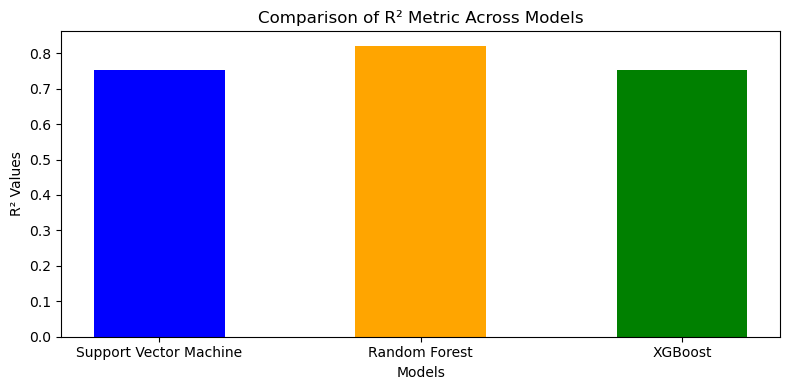

In [26]:
models = ['Support Vector Machine', 'Random Forest', 'XGBoost']

# R2 Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
r2_values = [svr_r2, rf_r2, xgb_r2]  # Örnek R² değerleri

# Grafik çizimi
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.5  # Sütun genişliği

# Sütunları oluşturma
ax.bar(models, r2_values, bar_width, color=['blue', 'orange', 'green'])

# Eksen etiketleri ve başlık
ax.set_xlabel('Models')
ax.set_ylabel('R² Values')
ax.set_title('Comparison of R² Metric Across Models')

# Grafik ayarları
plt.tight_layout()
plt.show()

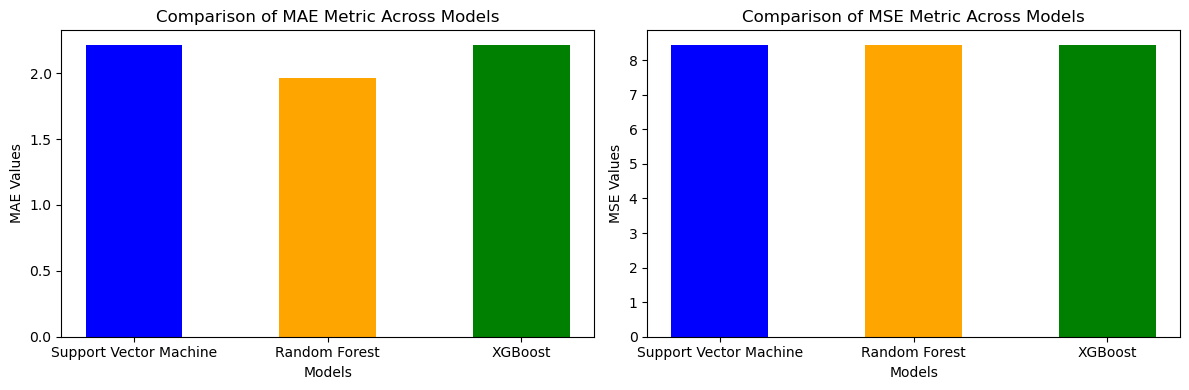

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Model isimleri
models = ['Support Vector Machine', 'Random Forest', 'XGBoost']

# MAE Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
mae_values = [svr_mae, rf_mae, xgb_mae]  # Örnek MAE değerleri

# MSE Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
mse_values = [svr_mse, xgb_mse, xgb_mse]  # Örnek MSE değerleri

# Grafik çizimi için ayarlar
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # İki grafik yan yana
bar_width = 0.5  # Sütun genişliği

# MAE için grafik çizimi
axes[0].bar(models, mae_values, bar_width, color=['blue', 'orange', 'green'])
axes[0].set_title('Comparison of MAE Metric Across Models')
axes[0].set_ylabel('MAE Values')
axes[0].set_xlabel('Models')

# MSE için grafik çizimi
axes[1].bar(models, mse_values, bar_width, color=['blue', 'orange', 'green'])
axes[1].set_title('Comparison of MSE Metric Across Models')
axes[1].set_ylabel('MSE Values')
axes[1].set_xlabel('Models')

# Grafik ayarları
plt.tight_layout()
plt.show()
